In [1]:
# Importing pandas and numpy for the practice. 

import pandas as pd
import numpy as np

## This file is for practice with groupby(), pivot_table(), agg(), and statistical function(min, max, np.mean, np.median...)

1. Homeless.csv : http://localhost:8888/notebooks/Desktop/DataCamp/Practice/Data_Manipulation_with_Pandas.ipynb#Homeless.CSV

2. Sales.csv:
http://localhost:8888/notebooks/Desktop/DataCamp/Practice/Data_Manipulation_with_Pandas.ipynb#Working-with-sales.csv-data-and-analyzing-its-statistics

3. Temperature.csv:
http://localhost:8888/notebooks/Desktop/DataCamp/Practice/Data_Manipulation_with_Pandas.ipynb#Temperatures.csv

4. Avocado.pkl
http://localhost:8888/notebooks/Desktop/DataCamp/Practice/Data_Manipulation_with_Pandas.ipynb#Visualizing-data

# Homeless.CSV

In [7]:
df_homeless = pd.read_csv('/Users/hyunjung/Desktop/DataCamp/data/homelessness.csv')

In [8]:
df_homeless.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588


In [9]:
df_homeless.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51 non-null     int64  
 1   region          51 non-null     object 
 2   state           51 non-null     object 
 3   individuals     51 non-null     float64
 4   family_members  51 non-null     float64
 5   state_pop       51 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.5+ KB


In [10]:
df_homeless.shape

(51, 6)

In [11]:
df_homeless.describe()

,Unnamed: 0,individuals,family_members,state_pop
count,51.000000,51.000000,51.000000,5.100000e+01
mean,25.000000,7225.784314,3504.882353,6.405637e+06
std,14.866069,15991.025083,7805.411811,7.327258e+06
min,0.000000,434.000000,75.000000,5.776010e+05
25%,12.500000,1446.500000,592.000000,1.777414e+06
50%,25.000000,3082.000000,1482.000000,4.461153e+06
75%,37.500000,6781.500000,3196.000000,7.340946e+06
max,50.000000,109008.000000,52070.000000,3.946159e+07


## Setting Data by States and Removing unneccesary column

In [12]:
df_homeless_by_states = df_homeless.set_index('state').drop(columns='Unnamed: 0')

In [13]:
df_homeless_by_states.head()

,region,individuals,family_members,state_pop
state,,,,
Alabama,East South Central,2570.0,864.0,4887681
Alaska,Pacific,1434.0,582.0,735139
Arizona,Mountain,7259.0,2606.0,7158024
Arkansas,West South Central,2280.0,432.0,3009733
California,Pacific,109008.0,20964.0,39461588


In [14]:
df_homeless_by_states.values

array([['East South Central', 2570.0, 864.0, 4887681],
       ['Pacific', 1434.0, 582.0, 735139],
       ['Mountain', 7259.0, 2606.0, 7158024],
       ['West South Central', 2280.0, 432.0, 3009733],
       ['Pacific', 109008.0, 20964.0, 39461588],
       ['Mountain', 7607.0, 3250.0, 5691287],
       ['New England', 2280.0, 1696.0, 3571520],
       ['South Atlantic', 708.0, 374.0, 965479],
       ['South Atlantic', 3770.0, 3134.0, 701547],
       ['South Atlantic', 21443.0, 9587.0, 21244317],
       ['South Atlantic', 6943.0, 2556.0, 10511131],
       ['Pacific', 4131.0, 2399.0, 1420593],
       ['Mountain', 1297.0, 715.0, 1750536],
       ['East North Central', 6752.0, 3891.0, 12723071],
       ['East North Central', 3776.0, 1482.0, 6695497],
       ['West North Central', 1711.0, 1038.0, 3148618],
       ['West North Central', 1443.0, 773.0, 2911359],
       ['East South Central', 2735.0, 953.0, 4461153],
       ['West South Central', 2540.0, 519.0, 4659690],
       ['New England', 145

In [15]:
print(df_homeless_by_states.columns)
print(df_homeless_by_states.index)

Index(['region', 'individuals', 'family_members', 'state_pop'], dtype='object')
Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='state')


In [16]:
df_homeless_by_states.head()

,region,individuals,family_members,state_pop
state,,,,
Alabama,East South Central,2570.0,864.0,4887681
Alaska,Pacific,1434.0,582.0,735139
Arizona,Mountain,7259.0,2606.0,7158024
Arkansas,West South Central,2280.0,432.0,3009733
California,Pacific,109008.0,20964.0,39461588


In [17]:
df_homeless_by_states.sort_values('individuals',ascending=False)

,region,individuals,family_members,state_pop
state,,,,
California,Pacific,109008.0,20964.0,39461588
New York,Mid-Atlantic,39827.0,52070.0,19530351
Florida,South Atlantic,21443.0,9587.0,21244317
Texas,West South Central,19199.0,6111.0,28628666
Washington,Pacific,16424.0,5880.0,7523869
Oregon,Pacific,11139.0,3337.0,4181886
Pennsylvania,Mid-Atlantic,8163.0,5349.0,12800922
Colorado,Mountain,7607.0,3250.0,5691287
Arizona,Mountain,7259.0,2606.0,7158024


In [18]:
df_homeless_by_states.sort_values(['individuals','state_pop'], ascending=[False,False])

,region,individuals,family_members,state_pop
state,,,,
California,Pacific,109008.0,20964.0,39461588
New York,Mid-Atlantic,39827.0,52070.0,19530351
Florida,South Atlantic,21443.0,9587.0,21244317
Texas,West South Central,19199.0,6111.0,28628666
Washington,Pacific,16424.0,5880.0,7523869
Oregon,Pacific,11139.0,3337.0,4181886
Pennsylvania,Mid-Atlantic,8163.0,5349.0,12800922
Colorado,Mountain,7607.0,3250.0,5691287
Arizona,Mountain,7259.0,2606.0,7158024


In [19]:
df_homeless_by_states['region']

state
Alabama                 East South Central
Alaska                             Pacific
Arizona                           Mountain
Arkansas                West South Central
California                         Pacific
Colorado                          Mountain
Connecticut                    New England
Delaware                    South Atlantic
District of Columbia        South Atlantic
Florida                     South Atlantic
Georgia                     South Atlantic
Hawaii                             Pacific
Idaho                             Mountain
Illinois                East North Central
Indiana                 East North Central
Iowa                    West North Central
Kansas                  West North Central
Kentucky                East South Central
Louisiana               West South Central
Maine                          New England
Maryland                    South Atlantic
Massachusetts                  New England
Michigan                East North Central
Minne

In [20]:
df_homeless_by_states[['individuals','state_pop']]

,individuals,state_pop
state,,
Alabama,2570.0,4887681
Alaska,1434.0,735139
Arizona,7259.0,7158024
Arkansas,2280.0,3009733
California,109008.0,39461588
Colorado,7607.0,5691287
Connecticut,2280.0,3571520
Delaware,708.0,965479
District of Columbia,3770.0,701547


## Subsetting based on multiple conditions

In [21]:
df_homeless_by_states[df_homeless_by_states['individuals']>5000]

,region,individuals,family_members,state_pop
state,,,,
Arizona,Mountain,7259.0,2606.0,7158024
California,Pacific,109008.0,20964.0,39461588
Colorado,Mountain,7607.0,3250.0,5691287
Florida,South Atlantic,21443.0,9587.0,21244317
Georgia,South Atlantic,6943.0,2556.0,10511131
Illinois,East North Central,6752.0,3891.0,12723071
Massachusetts,New England,6811.0,13257.0,6882635
Michigan,East North Central,5209.0,3142.0,9984072
Nevada,Mountain,7058.0,486.0,3027341


In [22]:
df_homeless_by_states[df_homeless_by_states['region']=="Mountain"]

,region,individuals,family_members,state_pop
state,,,,
Arizona,Mountain,7259.0,2606.0,7158024
Colorado,Mountain,7607.0,3250.0,5691287
Idaho,Mountain,1297.0,715.0,1750536
Montana,Mountain,983.0,422.0,1060665
Nevada,Mountain,7058.0,486.0,3027341
New Mexico,Mountain,1949.0,602.0,2092741
Utah,Mountain,1904.0,972.0,3153550
Wyoming,Mountain,434.0,205.0,577601


In [23]:
df_homeless_by_states[(df_homeless_by_states['region']=="Mountain") & (df_homeless_by_states['state_pop'] > 3000000)]

,region,individuals,family_members,state_pop
state,,,,
Arizona,Mountain,7259.0,2606.0,7158024
Colorado,Mountain,7607.0,3250.0,5691287
Nevada,Mountain,7058.0,486.0,3027341
Utah,Mountain,1904.0,972.0,3153550


## Subsetting using .isin()
----

- Region 4: West
    - Division 8: Mountain (Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming)
    - Division 9: Pacific (Alaska, California, Hawaii, Oregon, and Washington)

In [24]:
df_homeless_by_states_in_west = df_homeless_by_states[df_homeless_by_states['region'].isin(['Mountain','Pacific'])]
df_homeless_by_states_in_west

,region,individuals,family_members,state_pop
state,,,,
Alaska,Pacific,1434.0,582.0,735139
Arizona,Mountain,7259.0,2606.0,7158024
California,Pacific,109008.0,20964.0,39461588
Colorado,Mountain,7607.0,3250.0,5691287
Hawaii,Pacific,4131.0,2399.0,1420593
Idaho,Mountain,1297.0,715.0,1750536
Montana,Mountain,983.0,422.0,1060665
Nevada,Mountain,7058.0,486.0,3027341
New Mexico,Mountain,1949.0,602.0,2092741


## Adding a new column

In [25]:
df_homeless_by_states['Individuals ratio'] = df_homeless_by_states['individuals']/df_homeless_by_states['state_pop'] * 100

In [26]:
df_homeless_by_states['Family_members ratio'] = df_homeless_by_states['family_members']/df_homeless_by_states['state_pop'] * 100

In [27]:
df_homeless_by_states.sort_values(by=['Individuals ratio'], ascending=False)

,region,individuals,family_members,state_pop,Individuals ratio,Family_members ratio
state,,,,,,
District of Columbia,South Atlantic,3770.0,3134.0,701547,0.537384,0.446727
Hawaii,Pacific,4131.0,2399.0,1420593,0.290794,0.168873
California,Pacific,109008.0,20964.0,39461588,0.276238,0.053125
Oregon,Pacific,11139.0,3337.0,4181886,0.266363,0.079797
Nevada,Mountain,7058.0,486.0,3027341,0.233142,0.016054
Washington,Pacific,16424.0,5880.0,7523869,0.218292,0.078151
New York,Mid-Atlantic,39827.0,52070.0,19530351,0.203924,0.266611
Alaska,Pacific,1434.0,582.0,735139,0.195065,0.079169
Colorado,Mountain,7607.0,3250.0,5691287,0.133660,0.057105


## Summary Statistic

In [28]:
df_homeless_by_states.describe(include='all')

,region,individuals,family_members,state_pop,Individuals ratio,Family_members ratio
count,51,51.000000,51.000000,5.100000e+01,51.000000,51.000000
unique,9,NaN,NaN,NaN,NaN,NaN
top,South Atlantic,NaN,NaN,NaN,NaN,NaN
freq,9,NaN,NaN,NaN,NaN,NaN
mean,NaN,7225.784314,3504.882353,6.405637e+06,0.104300,0.054429
std,NaN,15991.025083,7805.411811,7.327258e+06,0.088298,0.072586
min,NaN,434.000000,75.000000,5.776010e+05,0.034351,0.009893
25%,NaN,1446.500000,592.000000,1.777414e+06,0.060498,0.025036
50%,NaN,3082.000000,1482.000000,4.461153e+06,0.071224,0.035106
75%,NaN,6781.500000,3196.000000,7.340946e+06,0.099947,0.046463


In [29]:
# Looking at 30% percentile
def pct30(column):
    return column.quantile(0.3)

def pct70(column):
    return column.quantile(0.7)

In [30]:
df_homeless_by_states['individuals'].agg(pct30)

1745.0

In [31]:
df_homeless_by_states[['individuals','state_pop']].agg([pct30,pct70])

,individuals,state_pop
pct30,1745.0,2092741.0
pct70,6139.0,6771631.0


In [32]:
# Cumulative Sum
df_homeless_by_states_in_west['individuals'].cumsum()

state
Alaska          1434.0
Arizona         8693.0
California    117701.0
Colorado      125308.0
Hawaii        129439.0
Idaho         130736.0
Montana       131719.0
Nevada        138777.0
New Mexico    140726.0
Oregon        151865.0
Utah          153769.0
Washington    170193.0
Wyoming       170627.0
Name: individuals, dtype: float64

In [33]:
df_homeless_by_states_in_west['individuals'].cummax()

state
Alaska          1434.0
Arizona         7259.0
California    109008.0
Colorado      109008.0
Hawaii        109008.0
Idaho         109008.0
Montana       109008.0
Nevada        109008.0
New Mexico    109008.0
Oregon        109008.0
Utah          109008.0
Washington    109008.0
Wyoming       109008.0
Name: individuals, dtype: float64

## Adding Total and total ratio per state population
----

In [34]:
df_homeless_by_states['Total'] = df_homeless_by_states['individuals'] + df_homeless_by_states['family_members']

In [35]:
df_homeless_by_states.head()

,region,individuals,family_members,state_pop,Individuals ratio,Family_members ratio,Total
state,,,,,,,
Alabama,East South Central,2570.0,864.0,4887681,0.052581,0.017677,3434.0
Alaska,Pacific,1434.0,582.0,735139,0.195065,0.079169,2016.0
Arizona,Mountain,7259.0,2606.0,7158024,0.101411,0.036407,9865.0
Arkansas,West South Central,2280.0,432.0,3009733,0.075754,0.014353,2712.0
California,Pacific,109008.0,20964.0,39461588,0.276238,0.053125,129972.0


In [36]:
df_homeless_by_states['Total ratio'] = df_homeless_by_states['Total'] /df_homeless_by_states['state_pop'] * 100

In [37]:
df_homeless_by_states.sort_values(by= 'Total ratio')

,region,individuals,family_members,state_pop,Individuals ratio,Family_members ratio,Total,Total ratio
state,,,,,,,,
Mississippi,East South Central,1024.0,328.0,2981020,0.034351,0.011003,1352.0,0.045354
Louisiana,West South Central,2540.0,519.0,4659690,0.054510,0.011138,3059.0,0.065648
West Virginia,South Atlantic,1021.0,222.0,1804291,0.056587,0.012304,1243.0,0.068891
Alabama,East South Central,2570.0,864.0,4887681,0.052581,0.017677,3434.0,0.070258
Virginia,South Atlantic,3928.0,2047.0,8501286,0.046205,0.024079,5975.0,0.070283
North Dakota,West North Central,467.0,75.0,758080,0.061603,0.009893,542.0,0.071496
Kansas,West North Central,1443.0,773.0,2911359,0.049564,0.026551,2216.0,0.076116
South Carolina,South Atlantic,3082.0,851.0,5084156,0.060620,0.016738,3933.0,0.077358
Indiana,East North Central,3776.0,1482.0,6695497,0.056396,0.022134,5258.0,0.078530


In [38]:
# Group data by region and checking total, minimum and maximum ratio.
df_homeless_by_states_group = df_homeless_by_states.groupby('region')['Total ratio']

In [156]:
df_homeless_by_states_group.agg([sum, min, max]).sort_values(by='sum')

,sum,min,max
region,,,
East South Central,0.314693,0.045354,0.116412
West South Central,0.342407,0.065648,0.098243
East North Central,0.418096,0.078530,0.087776
Mid-Atlantic,0.681851,0.105555,0.470534
West North Central,0.717843,0.071496,0.131900
New England,1.008734,0.104036,0.291574
Mountain,1.148905,0.091199,0.249196
Pacific,1.705867,0.274234,0.459667
South Atlantic,1.756779,0.068891,0.984111


Conclusion: Based on the data table, South Atlantic area has the highest ratio of homeless.  

----

# Working with sales.csv data and analyzing its statistics

In [39]:
df_sales = pd.read_csv('/Users/hyunjung/Desktop/DataCamp/data/sales_subset.csv')
print(df_sales.head())
print(df_sales.info())

   Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0           0      1    A           1  2010-02-05      24924.50       False   
1           1      1    A           1  2010-03-05      21827.90       False   
2           2      1    A           1  2010-04-02      57258.43       False   
3           3      1    A           1  2010-05-07      17413.94       False   
4           4      1    A           1  2010-06-04      17558.09       False   

   temperature_c  fuel_price_usd_per_l  unemployment  
0       5.727778              0.679451         8.106  
1       8.055556              0.693452         8.106  
2      16.816667              0.718284         7.808  
3      22.527778              0.748928         7.808  
4      27.050000              0.714586         7.808  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------

In [40]:
df_sales.head()

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [41]:
df_sales.drop(columns='Unnamed: 0', inplace=True)

In [42]:
df_sales.columns

Index(['store', 'type', 'department', 'date', 'weekly_sales', 'is_holiday',
       'temperature_c', 'fuel_price_usd_per_l', 'unemployment'],
      dtype='object')

In [43]:
df_sales[['temperature_c','fuel_price_usd_per_l', 'unemployment']].agg([np.median, max, min, np.mean])

,temperature_c,fuel_price_usd_per_l,unemployment
median,16.966667,0.743381,8.099000
max,33.827778,1.107674,9.765000
min,-8.366667,0.664129,3.879000
mean,15.731978,0.749746,8.082009


In [44]:
print(df_sales['weekly_sales'].mean())
print(df_sales['weekly_sales'].median())
print(df_sales['weekly_sales'].sum())
print(df_sales['weekly_sales'].max())
print(df_sales['weekly_sales'].min())

23843.950148505668
12049.064999999999
256894718.89999998
293966.05
-1098.0


In [45]:
df_weekly_sales = df_sales[['date','weekly_sales']]
df_weekly_sales.head()

,date,weekly_sales
0,2010-02-05,24924.50
1,2010-03-05,21827.90
2,2010-04-02,57258.43
3,2010-05-07,17413.94
4,2010-06-04,17558.09


In [46]:
print(df_sales['date'].min())

2010-02-05


In [47]:
df_sales['type'].value_counts()

A    9872
B     902
Name: type, dtype: int64

In [48]:
df_sales_by_store = df_sales.groupby(['type','store'])['weekly_sales'].sum().to_frame()

In [49]:
# Looking attribute subset and removing duplicates by subset  
df_sales.drop_duplicates(subset='store')

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
901,2,A,1,2010-02-05,35034.06,False,4.550000,0.679451,8.324
1798,4,A,1,2010-02-05,38724.42,False,6.533333,0.686319,8.623
2699,6,A,1,2010-02-05,25619.00,False,4.683333,0.679451,7.259
3593,10,B,1,2010-02-05,40212.84,False,12.411111,0.782478,9.765
4495,13,A,1,2010-02-05,46761.90,False,-0.261111,0.704283,8.316
5408,14,A,1,2010-02-05,32842.31,False,-2.605556,0.735455,8.992
6293,19,A,1,2010-02-05,21500.58,False,-6.133333,0.780365,8.350
7199,20,A,1,2010-02-05,46021.21,False,-3.377778,0.735455,8.187
8109,27,A,1,2010-02-05,32313.79,False,-2.672222,0.780365,8.237


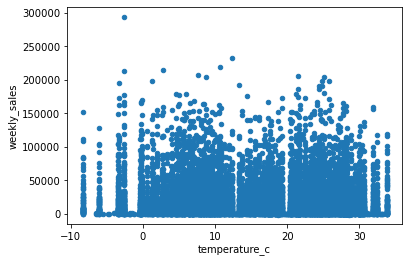

In [146]:
df_sales.plot(y='weekly_sales', x='temperature_c', kind='scatter')

In [50]:
df_sales.drop_duplicates(subset='type')

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
3593,10,B,1,2010-02-05,40212.84,False,12.411111,0.782478,9.765


In [51]:
df_sales.drop_duplicates(subset='date')

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...
9627,31,A,60,2010-04-23,7.00,False,17.894444,0.738361,8.200
9693,31,A,78,2010-09-17,-2.00,False,28.350000,0.682093,8.099
9694,31,A,78,2011-10-28,-12.88,False,18.588889,0.890789,7.441
9890,31,A,99,2011-04-22,100.00,False,21.550000,1.005703,7.931


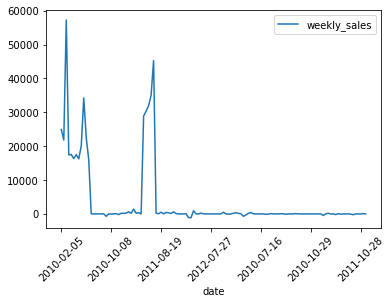

In [149]:
df_sales.drop_duplicates(subset='date').plot(x='date',y='weekly_sales',rot=45)

In [52]:
# unique values by date and store
df_sales_date_store= df_sales.drop_duplicates(subset=['date','store'])

In [53]:
df_sales_date_store['type'].value_counts()

A    525
B     33
Name: type, dtype: int64

In [54]:
df_sales_date_store['type'].value_counts(normalize=True)

A    0.94086
B    0.05914
Name: type, dtype: float64

In [55]:
df_sales.groupby('store')['weekly_sales'].agg([min,max,sum, np.mean]).sort_values(by='sum', ascending=False)

,min,max,sum,mean
store,,,,
14,-498.0,293966.05,26889842.67,30384.003017
20,-598.0,195223.84,25828317.41,28382.766385
2,-1098.0,178982.89,23786139.34,26517.435162
4,-88.0,165765.50,23540414.45,26126.986071
13,-98.0,166872.27,23431368.47,25664.149474
10,-798.0,232558.51,23178403.89,25696.678370
27,-409.0,177605.86,21786727.24,24207.474711
6,-698.0,119812.38,19275700.71,21561.186477
1,-698.0,140504.41,18828144.55,20896.941787


In [56]:
df_sales.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


## Pivot table
----

In [57]:
df_sales.pivot_table(values= ['weekly_sales','unemployment'], index='is_holiday', aggfunc=[max,min,sum, np.mean])

max                       min                       sum  \
           unemployment weekly_sales unemployment weekly_sales unemployment   
is_holiday                                                                    
False             9.765    293966.05        3.879      -1098.0    86745.084   
True              9.199      5350.00        5.143       -598.0      330.477   

                                 mean                
            weekly_sales unemployment  weekly_sales  
is_holiday                                           
False       2.568695e+08     8.082844  23934.913873  
True        2.522322e+04     7.868500    600.552857

In [58]:
df_sales.pivot_table(values= ['weekly_sales','unemployment'], index=['is_holiday','type'], aggfunc=[sum, np.mean])

sum                       mean              
                unemployment  weekly_sales unemployment  weekly_sales
is_holiday type                                                      
False      A       78392.208  2.336927e+08     7.973170  23768.583523
           B        8352.876  2.317678e+07     9.280973  25751.980533
True       A         313.404  2.360181e+04     7.835100    590.045250
           B          17.073  1.621410e+03     8.536500    810.705000

In [59]:
df_sales.pivot_table(values='weekly_sales', columns='type', index='store')

type,A,B
store,,
1,20896.941787,NaN
2,26517.435162,NaN
4,26126.986071,NaN
6,21561.186477,NaN
10,NaN,25696.67837
13,25664.149474,NaN
14,30384.003017,NaN
19,19930.838157,NaN
20,28382.766385,NaN


In [60]:
df_sales.pivot_table(values='weekly_sales', columns='type', index='store', fill_value=0)

type,A,B
store,,
1,20896.941787,0.00000
2,26517.435162,0.00000
4,26126.986071,0.00000
6,21561.186477,0.00000
10,0.000000,25696.67837
13,25664.149474,0.00000
14,30384.003017,0.00000
19,19930.838157,0.00000
20,28382.766385,0.00000


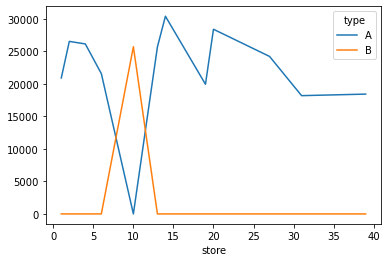

In [151]:
df_sales.pivot_table(values='weekly_sales', columns='type', index='store', fill_value=0).plot()

In [61]:
df_sales.pivot_table(values='weekly_sales', columns='type', index='store', fill_value=0, margins_name="Total", margins=True)

type,A,B,Total
store,,,
1,20896.941787,0.00000,20896.941787
2,26517.435162,0.00000,26517.435162
4,26126.986071,0.00000,26126.986071
6,21561.186477,0.00000,21561.186477
10,0.000000,25696.67837,25696.678370
13,25664.149474,0.00000,25664.149474
14,30384.003017,0.00000,30384.003017
19,19930.838157,0.00000,19930.838157
20,28382.766385,0.00000,28382.766385


# Temperatures.csv
---

In [62]:
df_temp = pd.read_csv('/Users/hyunjung/Desktop/DataCamp/data/temperatures.csv')
df_temp.head()

,Unnamed: 0,date,city,country,avg_temp_c
0,0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


In [63]:
df_temp.drop(columns='Unnamed: 0',inplace=True)

In [64]:
df_temp['country'].value_counts()

China                                 2640
India                                 2310
Brazil                                 990
Turkey                                 495
United States                          495
Egypt                                  495
Nigeria                                495
Pakistan                               495
Russia                                 330
Japan                                  330
Saudi Arabia                           330
South Africa                           330
Colombia                               330
Canada                                 330
Indonesia                              330
Australia                              330
Thailand                               165
Senegal                                165
Chile                                  165
Vietnam                                165
South Korea                            165
Peru                                   165
Sudan                                  165
Tanzania   

In [65]:
df_temp.index

RangeIndex(start=0, stop=16500, step=1)

In [66]:
df_temp_by_country_city = df_temp.pivot_table(index=['country','city'], values= 'avg_temp_c')

In [67]:
df_temp_by_country_city.head()

avg_temp_c
country     city                 
Afghanistan Kabul       15.525756
Angola      Luanda      24.387659
Australia   Melbourne   14.264043
            Sydney      17.792165
Bangladesh  Dhaka       26.164378

In [68]:
df_temp_by_country_city.loc[['South Korea','Taiwan']]

,,avg_temp_c
country,city,
South Korea,Seoul,11.693262
Taiwan,Taipei,23.078829


In [69]:
# Multilevel index: Subset inner levels with a list of tuples
df_temp_by_country_city.loc[[('China','Harbin')]]

,,avg_temp_c
country,city,
China,Harbin,4.858494


In [70]:
df_temp_by_country_city.loc[[('China','Harbin'),('South Korea','Seoul')]]

,,avg_temp_c
country,city,
China,Harbin,4.858494
South Korea,Seoul,11.693262


In [71]:
df_temp_by_country_city.sort_index()

avg_temp_c
country       city                        
Afghanistan   Kabul              15.525756
Angola        Luanda             24.387659
Australia     Melbourne          14.264043
              Sydney             17.792165
Bangladesh    Dhaka              26.164378
...                                    ...
United States Chicago            11.326170
              Los Angeles        16.649121
              New York           10.888255
Vietnam       Ho Chi Minh City   27.909878
Zimbabwe      Harare             20.721988

[100 rows x 1 columns]

In [72]:
df_temp_by_country_city.loc[('Australia','Melbourne'):('China','Harbin')]

avg_temp_c
country    city                      
Australia  Melbourne        14.264043
           Sydney           17.792165
Bangladesh Dhaka            26.164378
Brazil     Belo Horizonte   21.993579
           Brasília         22.699634
           Fortaleza        27.777024
           Rio De Janeiro   24.728043
           Salvador         25.592884
           São Paulo        20.645018
Burma      Rangoon          27.514213
Canada     Montreal          6.044248
           Toronto           7.230067
Chile      Santiago          6.345768
China      Changchun         6.135604
           Chengdu          11.387549
           Chongqing        17.534482
           Dalian           11.261476
           Guangzhou        22.205390
           Harbin            4.858494

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text major ticklabel objects>)

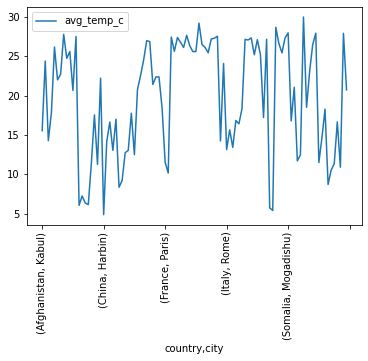

In [132]:
df_temp_by_country_city.plot(kind='line')
plt.xticks(rotation=90)

In [73]:
from datetime import datetime

In [74]:
df_temp['date'] = pd.to_datetime(df_temp['date'], format='%Y-%m-%d')

In [75]:
df_temp['date'].max()

Timestamp('2013-09-01 00:00:00')

In [76]:
df_temp['date'].min()

Timestamp('2000-01-01 00:00:00')

In [79]:
df_temp['date'].iloc[2001:2013]

2001   2001-10-01
2002   2001-11-01
2003   2001-12-01
2004   2002-01-01
2005   2002-02-01
2006   2002-03-01
2007   2002-04-01
2008   2002-05-01
2009   2002-06-01
2010   2002-07-01
2011   2002-08-01
2012   2002-09-01
Name: date, dtype: datetime64[ns]

In [106]:
df_temp_2012_sep=df_temp[df_temp['date'].isin(['2012-09-01'])]

In [107]:
df_temp_2012_sep.head()

,date,city,country,avg_temp_c
152,2012-09-01,Abidjan,Côte D'Ivoire,25.793
317,2012-09-01,Addis Abeba,Ethiopia,18.038
482,2012-09-01,Ahmadabad,India,28.087
647,2012-09-01,Aleppo,Syria,27.653
812,2012-09-01,Alexandria,Egypt,26.743


In [108]:
df_temp_2012_sep= df_temp_2012_sep.set_index('country').drop(columns='date')
df_temp_2012_sep.head()

,city,avg_temp_c
country,,
Côte D'Ivoire,Abidjan,25.793
Ethiopia,Addis Abeba,18.038
India,Ahmadabad,28.087
Syria,Aleppo,27.653
Egypt,Alexandria,26.743


In [83]:
df_temp_2012_sep.sort_index()

,city,avg_temp_c
country,,
Afghanistan,Kabul,21.043
Angola,Luanda,23.142
Australia,Melbourne,11.710
Australia,Sydney,16.431
Bangladesh,Dhaka,29.428
...,...,...
United States,Los Angeles,24.745
United States,New York,18.177
United States,Chicago,18.693


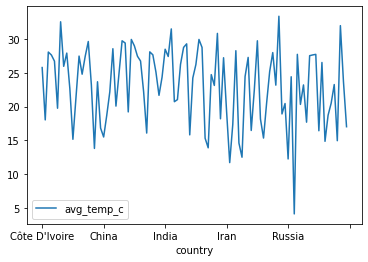

In [122]:
df_temp_2012_sep.plot(kind='line')

In [84]:
df_temp_2012_sep.loc['China']

,city,avg_temp_c
country,,
China,Changchun,16.829
China,Chengdu,15.507
China,Chongqing,22.198
China,Dalian,20.082
China,Guangzhou,26.759
China,Harbin,16.087
China,Jinan,20.733
China,Nanjing,22.444
China,Peking,20.506


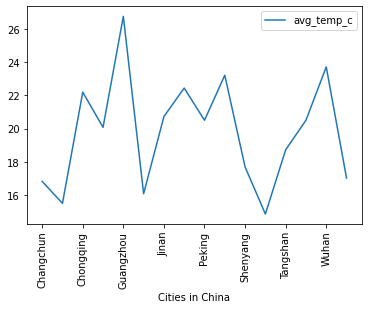

In [127]:
df_temp_2012_sep.loc['China'].plot(kind='line',x='city')
plt.xlabel(xlabel='Cities in China')
plt.xticks(rotation=90)
plt.show()

In [278]:
df_temp_2012_sep.loc[['China','United States']]

,city,avg_temp_c
country,,
China,Changchun,16.829
China,Chengdu,15.507
China,Chongqing,22.198
China,Dalian,20.082
China,Guangzhou,26.759
China,Harbin,16.087
China,Jinan,20.733
China,Nanjing,22.444
China,Peking,20.506


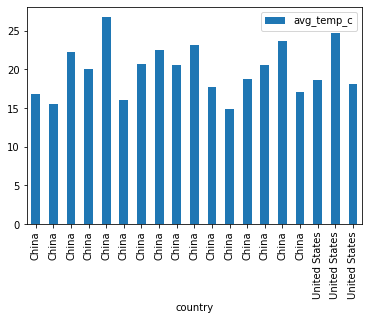

In [120]:
df_temp_2012_sep.loc[['China','United States']].plot(kind='bar')

# Visualizing data
----

## Loading data Avocado.pkl

In [87]:
import matplotlib.pyplot as plt
import pickle

In [93]:
avo_file = open('/Users/hyunjung/Desktop/DataCamp/data/avoplotto.pkl','rb')
avo_df = pickle.load(avo_file)

In [90]:
print(avo_df)

            date          type  year  avg_price         size     nb_sold
0     2015-12-27  conventional  2015       0.95        small  9626901.09
1     2015-12-20  conventional  2015       0.98        small  8710021.76
2     2015-12-13  conventional  2015       0.93        small  9855053.66
3     2015-12-06  conventional  2015       0.89        small  9405464.36
4     2015-11-29  conventional  2015       0.99        small  8094803.56
...          ...           ...   ...        ...          ...         ...
1009  2018-02-04       organic  2018       1.53  extra_large     1703.52
1010  2018-01-28       organic  2018       1.61  extra_large     1270.61
1011  2018-01-21       organic  2018       1.63  extra_large     1490.02
1012  2018-01-14       organic  2018       1.59  extra_large     1580.01
1013  2018-01-07       organic  2018       1.51  extra_large     1289.07

[1014 rows x 6 columns]


In [92]:
avo_df = pd.DataFrame(avo_df)
avo_df.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [95]:
avo_df.describe()

,year,avg_price,nb_sold
count,1014.000000,1014.000000,1.014000e+03
mean,2016.147929,1.319024,4.167774e+06
std,0.940380,0.295168,5.596185e+06
min,2015.000000,0.760000,8.343000e+02
25%,2015.000000,1.040000,1.320755e+05
50%,2016.000000,1.325000,4.232327e+05
75%,2017.000000,1.540000,1.019066e+07
max,2018.000000,2.090000,2.274362e+07


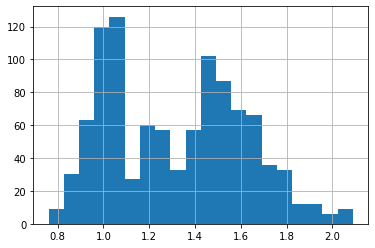

In [98]:
avo_df['avg_price'].hist(bins=20)
plt.show()

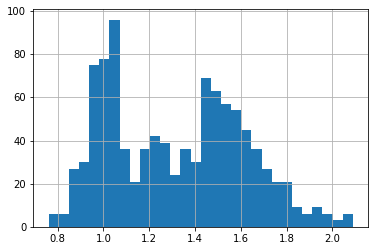

In [99]:
avo_df['avg_price'].hist(bins=30)
plt.show()

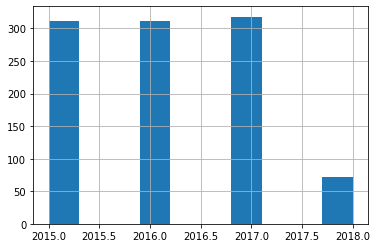

In [97]:
avo_df['year'].hist()

In [114]:
avo_df_by_type= avo_df.pivot_table(index=['type'],values=['avg_price','nb_sold'])

In [115]:
avo_df_by_type

,avg_price,nb_sold
type,,
conventional,1.092012,8.181515e+06
organic,1.546036,1.540329e+05


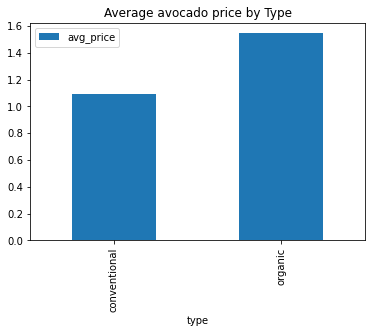

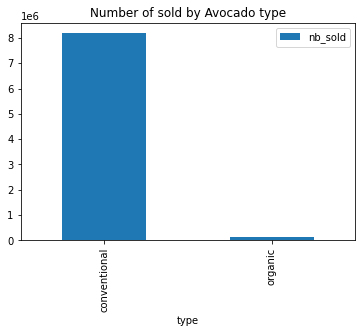

In [119]:
avo_df_by_type.plot(kind='bar',y='avg_price', title='Average avocado price by Type')
avo_df_by_type.plot(kind='bar',y='nb_sold', title='Number of sold by Avocado type')
plt.show()

In [133]:
avo_df.head(10)

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56
5,2015-11-22,conventional,2015,0.96,small,8571849.80
6,2015-11-15,conventional,2015,0.92,small,9907981.27
7,2015-11-08,conventional,2015,0.97,small,9991330.31
8,2015-11-01,conventional,2015,0.97,small,10138703.85
9,2015-10-25,conventional,2015,1.04,small,8683958.80


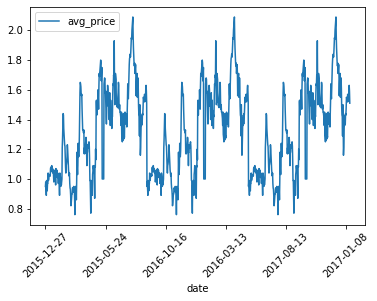

In [140]:
avo_df.plot(x='date',y='avg_price',kind='line',rot=45)
plt.show()

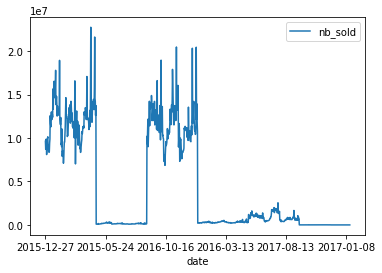

In [137]:
avo_df.plot(x='date',y='nb_sold',kind='line')
plt.show()

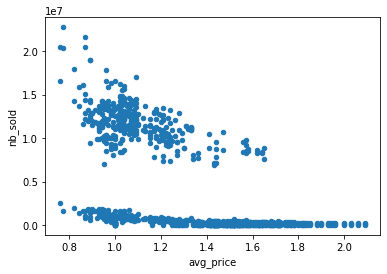

In [142]:
# Scatter plot: Both are numerical values
avo_df.plot(x='avg_price',y='nb_sold',kind='scatter')
plt.show()

In [152]:
avo_df_by_type

,avg_price,nb_sold
type,,
conventional,1.092012,8.181515e+06
organic,1.546036,1.540329e+05


[]

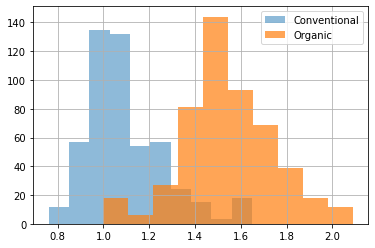

In [158]:
avo_df[avo_df['type'] == 'conventional']['avg_price'].hist(alpha=0.5)
avo_df[avo_df['type'] == 'organic']['avg_price'].hist(alpha=0.7)
plt.legend(['Conventional','Organic'])
plt.plot()

In [160]:
avo_df['size'].value_counts()

extra_large    338
small          338
large          338
Name: size, dtype: int64

No handles with labels found to put in legend.


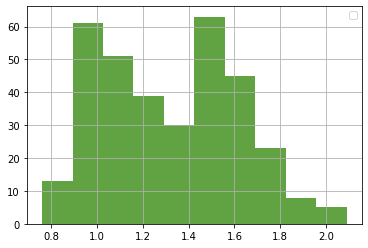

In [166]:
avo_df[avo_df['size']=='small']['avg_price'].hist(alpha=0.3)
avo_df[avo_df['size']=='extra_large']['avg_price'].hist(alpha=0.5)
avo_df[avo_df['size']=='large']['avg_price'].hist(alpha=0.7)
plt.show()

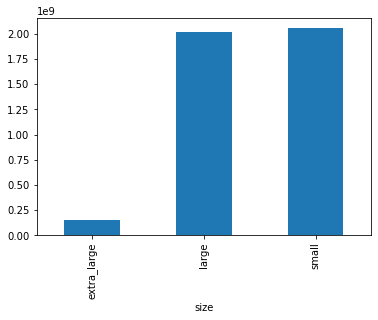

In [168]:
avo_df.groupby('size')['nb_sold'].sum().plot(kind='bar')

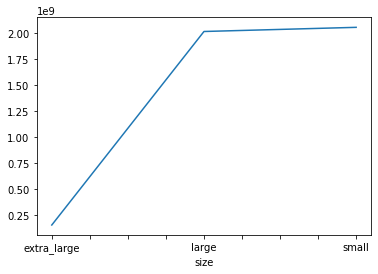

In [169]:
avo_df.groupby('size')['nb_sold'].sum().plot(kind='line')

size
extra_large    AxesSubplot(0.125,0.125;0.775x0.755)
large          AxesSubplot(0.125,0.125;0.775x0.755)
small          AxesSubplot(0.125,0.125;0.775x0.755)
Name: avg_price, dtype: object

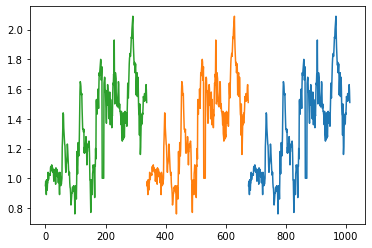

In [173]:
avo_df.groupby('size')['avg_price'].plot(kind='line')

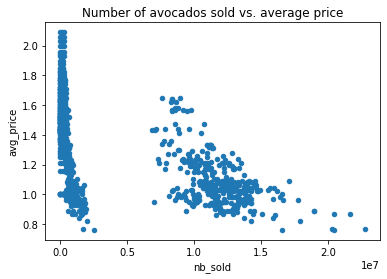

In [174]:
# Scatter plot of nb_sold vs avg_price with title
avo_df.plot(x='nb_sold', y='avg_price', kind='scatter', title='Number of avocados sold vs. average price')


In [181]:
avo_df[avo_df['year']==2016]

,date,type,year,avg_price,size,nb_sold
52,2016-12-25,conventional,2016,1.00,small,9255125.20
53,2016-12-18,conventional,2016,0.96,small,9394065.91
54,2016-12-11,conventional,2016,0.98,small,9009996.11
55,2016-12-04,conventional,2016,1.00,small,11043350.90
56,2016-11-27,conventional,2016,1.21,small,7891487.94
...,...,...,...,...,...,...
944,2016-01-31,organic,2016,1.43,extra_large,5515.91
945,2016-01-24,organic,2016,1.41,extra_large,12933.97
946,2016-01-17,organic,2016,1.44,extra_large,13106.29
947,2016-01-10,organic,2016,1.35,extra_large,8771.79


In [184]:
avo_df[avo_df.isnull()].count()

date         0
type         0
year         0
avg_price    0
size         0
nb_sold      0
dtype: int64

In [185]:
avo_df[avo_df.isna()].count()

date         0
type         0
year         0
avg_price    0
size         0
nb_sold      0
dtype: int64

In [186]:
avo_df.isna().any()

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool

In [187]:
df_homeless.isna().any()

Unnamed: 0        False
region            False
state             False
individuals       False
family_members    False
state_pop         False
dtype: bool

In [188]:
df_sales.isna().any()

store                   False
type                    False
department              False
date                    False
weekly_sales            False
is_holiday              False
temperature_c           False
fuel_price_usd_per_l    False
unemployment            False
dtype: bool

In [189]:
df_temp.isna().any()

date          False
city          False
country       False
avg_temp_c     True
dtype: bool

In [190]:
df_temp.isna().sum()

date           0
city           0
country        0
avg_temp_c    93
dtype: int64

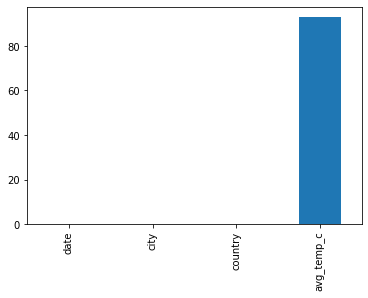

In [191]:
df_temp.isna().sum().plot(kind='bar')

In [192]:
df_temp_dropna = df_temp.dropna()

In [199]:
avocados_list = [
    {'date': "2019-11-03", 'small_sold': 10376832, 'large_sold': 7835071},
    {'date': '2019-11-10', 'small_sold': 10717154, 'large_sold': 8561348},
]
avo_df_2019 = pd.DataFrame(avocados_list)

In [200]:
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}

avo_df_2019_1=pd.DataFrame(avocados_dict)

In [201]:
print(avo_df_2019)
print(avo_df_2019_1)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348
         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


In [204]:
avo_df_2019 = pd.concat([avo_df_2019,avo_df_2019_1],ignore_index=True )

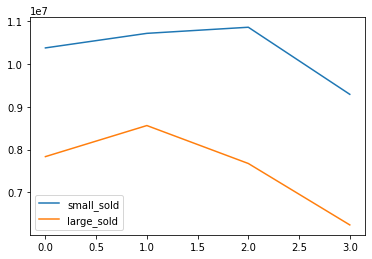

In [205]:
avo_df_2019.plot()